In [62]:
from coffea.util import load
import matplotlib.pyplot as plt
import hist

out = load("output_all.coffea")

In [63]:
hist_top_mass = out["variables"]["top_mass"]['Signal_1000']['Signal_1000_2018']
hist_T_mass = out["variables"]["VLT_mass"]['Signal_1000']['Signal_1000_2018']
hist_WT_mass = out["variables"]["WTransverse"]['Signal_1000']['Signal_1000_2018']

In [64]:
hist_top_nominal = hist_top_mass[{"cat": "SR", 'variation': "nominal"}]
hist_T_nominal = hist_T_mass[{"cat": "SR", 'variation': "nominal"}]
hist_WT_nominal = hist_WT_mass[{"cat": "SR", 'variation': "nominal"}]

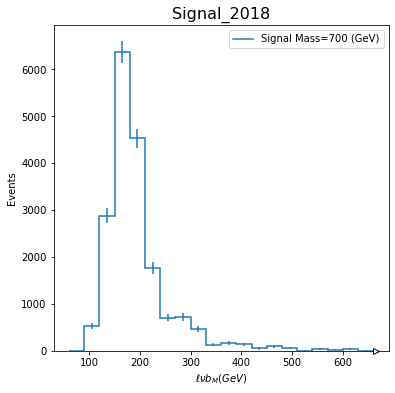

In [65]:
fig, ax = plt.subplots(figsize=(6, 6))

hist.Hist.plot1d(hist_top_nominal)
plt.title(r"Signal_2018", fontsize=16)
plt.xlabel(r"${\ell\nu b}_M(GeV)$")
plt.ylabel("Events")
plt.legend(["Signal Mass=700 (GeV)"])
plt.savefig("signal_top_mass.png", dpi=300, bbox_inches="tight")
plt.show()

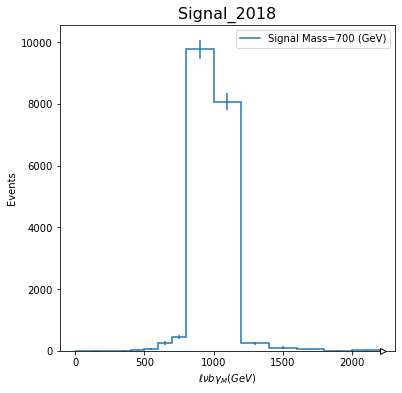

In [66]:
fig, ax = plt.subplots(figsize=(6, 6))

hist.Hist.plot1d(hist_T_nominal)
plt.title(r"Signal_2018", fontsize=16)
plt.xlabel(r"${\ell\nu b \gamma}_M(GeV)$")
plt.ylabel("Events")
plt.legend(["Signal Mass=700 (GeV)"])
plt.savefig("signal_T_mass.png", dpi=300, bbox_inches="tight")
plt.show()

In [67]:
hist_2d = out["custom_info"]["corr_hists"]["Signal_1000"]

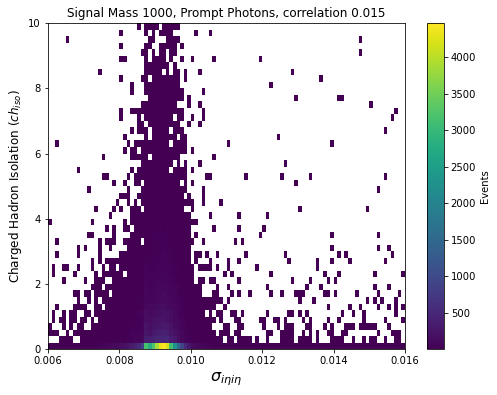

In [68]:
import numpy as np

# Extract histogram values and create a masked array
hist_values = hist_2d.values().T  # Transpose for correct orientation
masked_values = np.ma.masked_where(hist_values == 0, hist_values)  # Mask zero values

# Plot the 2D histogram
plt.figure(figsize=(8, 6))
plt.pcolormesh(
    hist_2d.axes[0].edges,  # sieie bin edges
    hist_2d.axes[1].edges,  # chiso bin edges
    masked_values,          # Use the masked array
    shading="auto",         # Smooth shading
    cmap="viridis",         # Colormap for non-zero values
)

# Set zero values to white
cmap = plt.cm.viridis
cmap.set_bad(color="white")  # Set masked values (zeros) to white

# Add labels and colorbar
plt.xlabel("$\sigma_{i\eta i\eta}$", fontsize=16)
plt.ylabel("Charged Hadron Isolation ($ch_{iso}$)", fontsize=12)
plt.title("Signal Mass 1000, Prompt Photons, correlation 0.015", fontsize=12)
plt.colorbar(label="Events")

# Save or show the plot
plt.savefig("sieie_vs_chiso_signal.png", dpi=300, bbox_inches="tight")
plt.show()

In [69]:
import numpy as np  
import hist  

# Example data to generate a 2D histogram  
data_x = np.random.normal(0, 1, 1000)  
data_y = np.random.normal(0, 1, 1000)  

# Extract the bin counts and edges  
counts = hist_2d.values()  
x_edges = hist_2d.axes[0].edges  
y_edges = hist_2d.axes[1].edges  

# Compute bin centers  
x_centers = (x_edges[:-1] + x_edges[1:]) / 2  
y_centers = (y_edges[:-1] + y_edges[1:]) / 2  

# Flatten arrays for calculation  
X_flat = np.repeat(x_centers, len(y_centers))  # Each x center repeated for each y center  
Y_flat = np.tile(y_centers, len(x_centers))    # Each y center repeated for each x center  
counts_flat = counts.flatten()  

# Remove bins with zero counts to avoid issues with mean calculations  
nonzero_mask = counts_flat > 0  
X_nonzero = X_flat[nonzero_mask]  
Y_nonzero = Y_flat[nonzero_mask]  
counts_nonzero = counts_flat[nonzero_mask]  

# Compute weighted means  
mean_x = np.average(X_nonzero, weights=counts_nonzero)  
mean_y = np.average(Y_nonzero, weights=counts_nonzero)  

# Compute the covariance  
cov = np.average((X_nonzero - mean_x) * (Y_nonzero - mean_y), weights=counts_nonzero)  

# Compute standard deviations  
std_x = np.sqrt(np.average((X_nonzero - mean_x)**2, weights=counts_nonzero))  
std_y = np.sqrt(np.average((Y_nonzero - mean_y)**2, weights=counts_nonzero))  

# Compute the Pearson correlation coefficient  
correlation = cov / (std_x * std_y)  

print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.015554179136766409


In [70]:
hist_2d = out["custom_info"]["corr_hists"]["WJets"]

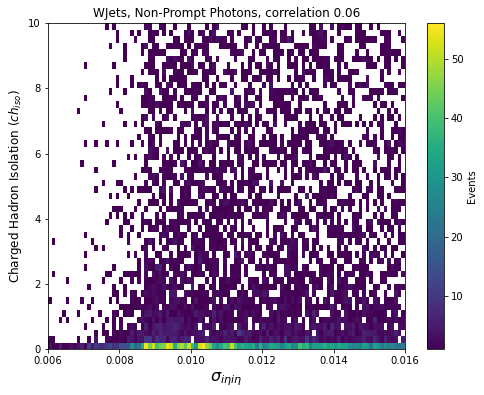

In [71]:
import numpy as np

# Extract histogram values and create a masked array
hist_values = hist_2d.values().T  # Transpose for correct orientation
masked_values = np.ma.masked_where(hist_values == 0, hist_values)  # Mask zero values

# Plot the 2D histogram
plt.figure(figsize=(8, 6))
plt.pcolormesh(
    hist_2d.axes[0].edges,  # sieie bin edges
    hist_2d.axes[1].edges,  # chiso bin edges
    masked_values,          # Use the masked array
    shading="auto",         # Smooth shading
    cmap="viridis",         # Colormap for non-zero values
)

# Set zero values to white
cmap = plt.cm.viridis
cmap.set_bad(color="white")  # Set masked values (zeros) to white

# Add labels and colorbar
plt.xlabel("$\sigma_{i\eta i\eta}$", fontsize=16)
plt.ylabel("Charged Hadron Isolation ($ch_{iso}$)", fontsize=12)
plt.title("WJets, Non-Prompt Photons, correlation 0.06", fontsize=12)
plt.colorbar(label="Events")

# Save or show the plot
plt.savefig("sieie_vs_chiso_wjets.png", dpi=300, bbox_inches="tight")
plt.show()

In [39]:
import numpy as np

# Extract bin centers and histogram values
sieie_bin_centers = (hist_2d.axes[0].edges[:-1] + hist_2d.axes[0].edges[1:]) / 2  # sieie bin centers
chiso_bin_centers = (hist_2d.axes[1].edges[:-1] + hist_2d.axes[1].edges[1:]) / 2  # chiso bin centers
hist_values = hist_2d.values()  # Histogram values (weights)

# Create meshgrid for sieie and chiso bin centers
sieie_grid, chiso_grid = np.meshgrid(sieie_bin_centers, chiso_bin_centers, indexing="ij")

# Flatten the arrays
sieie_flat = sieie_grid.flatten()
chiso_flat = chiso_grid.flatten()
weights_flat = hist_values.flatten()

# Remove bins with zero weight (optional, to avoid unnecessary calculations)
mask = weights_flat > 0
sieie_flat = sieie_flat[mask]
chiso_flat = chiso_flat[mask]
weights_flat = weights_flat[mask]

# Compute weighted mean
mean_sieie = np.average(sieie_flat, weights=weights_flat)
mean_chiso = np.average(chiso_flat, weights=weights_flat)

# Compute weighted covariance and variances
covariance = np.average(
    (sieie_flat - mean_sieie) * (chiso_flat - mean_chiso),
    weights=weights_flat,
)
variance_sieie = np.average(
    (sieie_flat - mean_sieie) ** 2,
    weights=weights_flat,
)
variance_chiso = np.average(
    (chiso_flat - mean_chiso) ** 2,
    weights=weights_flat,
)

# Compute Pearson correlation coefficient
correlation = covariance / np.sqrt(variance_sieie * variance_chiso)

print(f"Correlation between sieie and chiso: {correlation:.4f}")

Correlation between sieie and chiso: 0.0606


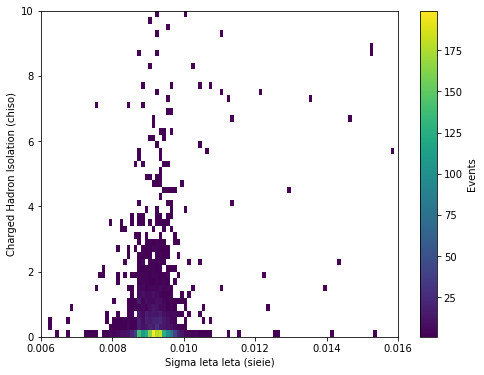

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Extract histogram values and create a masked array
hist_values = hist_2d.values().T  # Transpose for correct orientation
masked_values = np.ma.masked_where(hist_values == 0, hist_values)  # Mask zero values

# Plot the 2D histogram
plt.figure(figsize=(8, 6))
plt.pcolormesh(
    hist_2d.axes[0].edges,  # sieie bin edges
    hist_2d.axes[1].edges,  # chiso bin edges
    masked_values,          # Use the masked array
    shading="auto",         # Smooth shading
    cmap="viridis",         # Colormap for non-zero values
)

# Set zero values to white
cmap = plt.cm.viridis
cmap.set_bad(color="white")  # Set masked values (zeros) to white

# Add labels and colorbar
plt.xlabel("Sigma Ieta Ieta (sieie)")
plt.ylabel("Charged Hadron Isolation (chiso)")
plt.colorbar(label="Events")

# Save or show the plot
plt.savefig("sieie_vs_chiso_heatmap_white_zeros.png", dpi=300, bbox_inches="tight")
plt.show()

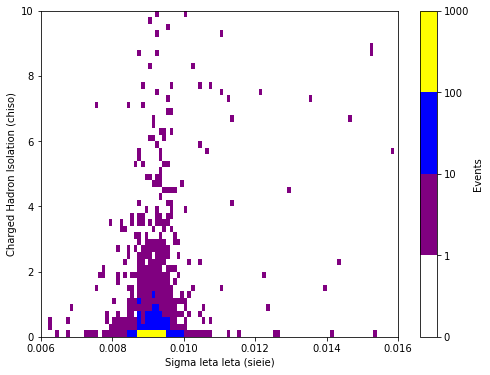

In [5]:
import matplotlib.pyplot as plt  
import matplotlib.colors as mcolors  
import numpy as np  

# Create a custom colormap  
colors = [  
    "white",    # 0 values  
    "purple",   # >1 values  
    "blue",     # intermediate values  
    "green",    # intermediate values  
    "yellow",   # highest values  
]  
cmap = mcolors.ListedColormap(colors)  

# Define the boundaries for the colormap  
bounds = [0, 1, 10, 100, 1000]  # Adjust these boundaries as needed  
norm = mcolors.BoundaryNorm(bounds, cmap.N)  

# Plot the 2D histogram  
plt.figure(figsize=(8, 6))  
mesh = plt.pcolormesh(  
    hist_2d.axes[0].edges,  # sieie bin edges  
    hist_2d.axes[1].edges,  # chiso bin edges  
    hist_2d.values().T,     # Transpose for correct orientation  
    shading="auto",         # Smooth shading  
    cmap=cmap,              # Custom colormap  
    norm=norm,              # Normalization for the colormap  
)  

# Add labels and colorbar  
plt.xlabel("Sigma Ieta Ieta (sieie)")  
plt.ylabel("Charged Hadron Isolation (chiso)")  
cbar = plt.colorbar(mesh, label="Events")  
cbar.set_ticks(bounds)  # Set ticks for the colorbar  

# Save or show the plot  
plt.savefig("sieie_vs_chiso_heatmap.png", dpi=300, bbox_inches="tight")  
plt.show()  

In [6]:
import numpy as np

# Extract bin centers and histogram values
sieie_bin_centers = (hist_2d.axes[0].edges[:-1] + hist_2d.axes[0].edges[1:]) / 2  # sieie bin centers
chiso_bin_centers = (hist_2d.axes[1].edges[:-1] + hist_2d.axes[1].edges[1:]) / 2  # chiso bin centers
hist_values = hist_2d.values()  # Histogram values (weights)

# Create meshgrid for sieie and chiso bin centers
sieie_grid, chiso_grid = np.meshgrid(sieie_bin_centers, chiso_bin_centers, indexing="ij")

# Flatten the arrays
sieie_flat = sieie_grid.flatten()
chiso_flat = chiso_grid.flatten()
weights_flat = hist_values.flatten()

# Remove bins with zero weight (optional, to avoid unnecessary calculations)
mask = weights_flat > 0
sieie_flat = sieie_flat[mask]
chiso_flat = chiso_flat[mask]
weights_flat = weights_flat[mask]

# Compute weighted mean
mean_sieie = np.average(sieie_flat, weights=weights_flat)
mean_chiso = np.average(chiso_flat, weights=weights_flat)

# Compute weighted covariance and variances
covariance = np.average(
    (sieie_flat - mean_sieie) * (chiso_flat - mean_chiso),
    weights=weights_flat,
)
variance_sieie = np.average(
    (sieie_flat - mean_sieie) ** 2,
    weights=weights_flat,
)
variance_chiso = np.average(
    (chiso_flat - mean_chiso) ** 2,
    weights=weights_flat,
)

# Compute Pearson correlation coefficient
correlation = covariance / np.sqrt(variance_sieie * variance_chiso)

print(f"Correlation between sieie and chiso: {correlation:.4f}")

Correlation between sieie and chiso: 0.1964
